In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.feature_selection import chi2, RFE

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, explained_variance_score, plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import Pipeline

from pickle import dump
from pickle import load

import warnings
warnings.filterwarnings('ignore')

In [2]:
msh_data = pd.read_csv('DataAlternatif.csv')
msh_data.head(10)

,Status,Character,Capacity,Capital,Condition,Collateral
0,Aproved,Percaya,Mampu,Baik,Baik,Kuat
1,Reject,Tidak,Mampu,Baik,Baik,Kuat
2,Reject,Percaya,Tidak,Baik,Baik,Kuat
3,Reject,Percaya,Mampu,Tidak,Baik,Kuat
4,Reject,Percaya,Mampu,Baik,Tidak,Kuat
5,Reject,Percaya,Mampu,Baik,Baik,Tidak
6,Aproved,Normal,Mampu,Baik,Baik,Kuat
7,Aproved,Percaya,Sedang,Baik,Baik,Kuat
8,Aproved,Percaya,Mampu,Sedang,Baik,Kuat
9,Aproved,Percaya,Mampu,Baik,Normal,Kuat


In [3]:
# Checking the size of dataset
msh_data.shape

(125, 6)

In [4]:
#Summarizing the overall dataset
msh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Status      125 non-null    object
 1   Character   125 non-null    object
 2   Capacity    125 non-null    object
 3   Capital     125 non-null    object
 4   Condition   125 non-null    object
 5   Collateral  125 non-null    object
dtypes: object(6)
memory usage: 6.0+ KB


In [5]:
#Checking the null values in dataset
msh_data.isnull().sum()

Status        0
Character     0
Capacity      0
Capital       0
Condition     0
Collateral    0
dtype: int64

In [6]:
#Checking the duplicate values
msh_data.duplicated().sum()

0

In [7]:
#Statistical description of data
msh_data.describe(include='O')

,Status,Character,Capacity,Capital,Condition,Collateral
count,125,125,125,125,125,125
unique,2,3,3,3,3,3
top,Reject,Percaya,Mampu,Baik,Baik,Kuat
freq,93,46,45,45,43,49


In [8]:
#Checking the unique values in each column
col = msh_data.columns

for i in col:
    uqv = msh_data[i].unique()
    print(i, ':', uqv,'\n')

Status : ['Aproved' 'Reject'] 

Character : ['Percaya' 'Tidak' 'Normal'] 

Capacity : ['Mampu' 'Tidak' 'Sedang'] 

Capital : ['Baik' 'Tidak' 'Sedang'] 

Condition : ['Baik' 'Tidak' 'Normal'] 

Collateral : ['Kuat' 'Tidak' 'Sedang'] 



In [21]:
#Count of the unique values in each columns
col = msh_data.columns

for i in col:
    c_uqv = msh_data.value_counts(i)
    print(c_uqv,'\n' '\n')

Status
Reject     93
Aproved    32
dtype: int64 


Character
Percaya    46
Tidak      40
Normal     39
dtype: int64 


Capacity
Mampu     45
Tidak     41
Sedang    39
dtype: int64 


Capital
Baik      45
Sedang    41
Tidak     39
dtype: int64 


Condition
Baik      43
Normal    41
Tidak     41
dtype: int64 


Collateral
Kuat      49
Sedang    39
Tidak     37
dtype: int64 




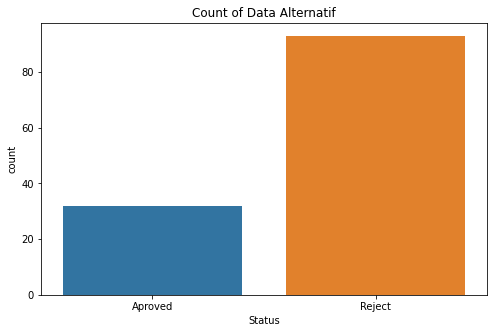

In [9]:
#Visualising the count of mushroom class
plt.figure(figsize=(8,5))
ax = sns.countplot(x = msh_data['Status'])
plt.title('Count of Data Alternatif')
plt.show()

In [10]:
data = msh_data.copy()

In [11]:
data.Status=data.Status.map({'Aproved':1,'Reject':0})
data.Status.value_counts()

0    93
1    32
Name: Status, dtype: int64

In [12]:
data.Character=data.Character.map({'Percaya':2,'Normal':1,'Tidak':0})
data.Character.value_counts()

2    46
0    40
1    39
Name: Character, dtype: int64

In [13]:
data.Capacity=data.Capacity.map({'Mampu':2,'Sedang':1,'Tidak':0})
data.Capacity.value_counts()

2    45
0    41
1    39
Name: Capacity, dtype: int64

In [14]:
data.Capital=data.Capital.map({'Baik':2,'Sedang':1,'Tidak':0})
data.Capital.value_counts()

2    45
1    41
0    39
Name: Capital, dtype: int64

In [15]:
data.Condition=data.Condition.map({'Baik':2,'Normal':1,'Tidak':0})
data.Condition.value_counts()

2    43
0    41
1    41
Name: Condition, dtype: int64

In [16]:
data.Collateral=data.Collateral.map({'Kuat':2,'Sedang':1,'Tidak':0})
data.Collateral.value_counts()

2    49
1    39
0    37
Name: Collateral, dtype: int64

In [17]:
data.isnull().sum()

Status        0
Character     0
Capacity      0
Capital       0
Condition     0
Collateral    0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Status      125 non-null    int64
 1   Character   125 non-null    int64
 2   Capacity    125 non-null    int64
 3   Capital     125 non-null    int64
 4   Condition   125 non-null    int64
 5   Collateral  125 non-null    int64
dtypes: int64(6)
memory usage: 6.0 KB


In [19]:
data.head(10)

,Status,Character,Capacity,Capital,Condition,Collateral
0,1,2,2,2,2,2
1,0,0,2,2,2,2
2,0,2,0,2,2,2
3,0,2,2,0,2,2
4,0,2,2,2,0,2
5,0,2,2,2,2,0
6,1,1,2,2,2,2
7,1,2,1,2,2,2
8,1,2,2,1,2,2
9,1,2,2,2,1,2


In [21]:
#Splitting the variables into features & target
X = data.iloc[:, 1:]
y = data[['Status']]

In [22]:
#Segregating data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True)

In [34]:
rfc = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [35]:
# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)

In [36]:
#Testing the accuracy for all models
cc  = [y_pred]
mod = ['Random Forest']

print('Accuracy Scores for all models','\n')

for i,j in zip(cc, mod):
    print('==========================')
    print(j, ':', accuracy_score(y_test, i).round(2))
    print('==========================', '\n')

Accuracy Scores for all models 

Random Forest : 1.0



In [37]:
rfc.predict(X_test)

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0])

In [38]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report, ConfusionMatrixDisplay
accuracy_train_rf = rfc.score(X_train, y_train)
accuracy_test_rf  = rfc.score(X_test, y_test)

In [39]:
print(f"Akurasi Model (Train) : {np.round(accuracy_train_rf * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test_rf * 100,2)} %")

Akurasi Model (Train) : 100.0 %
Akurasi Model (Test)  : 100.0 %


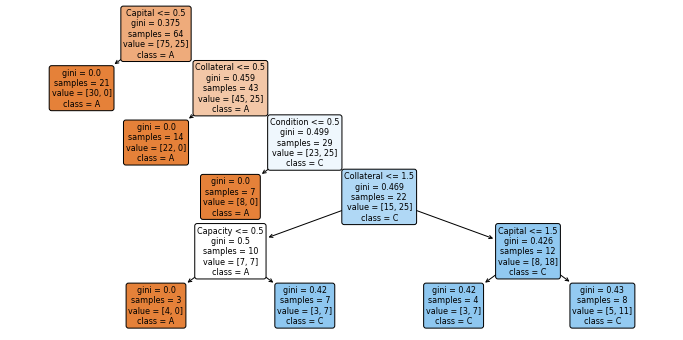

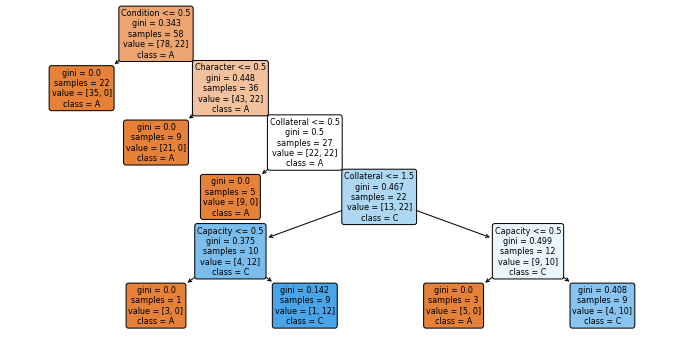

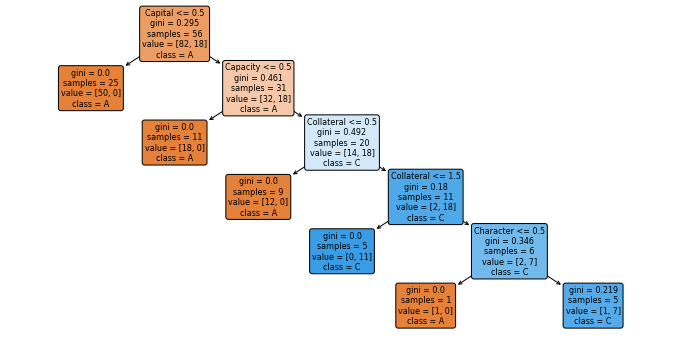

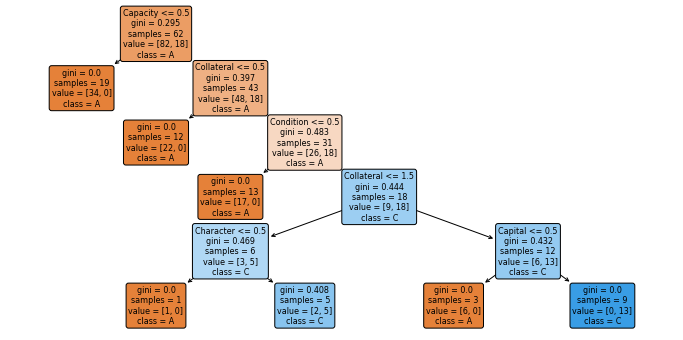

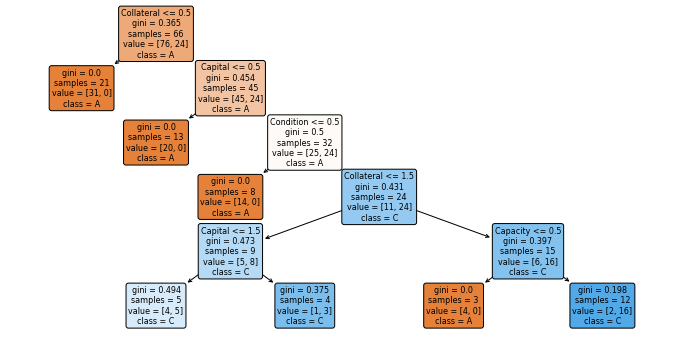

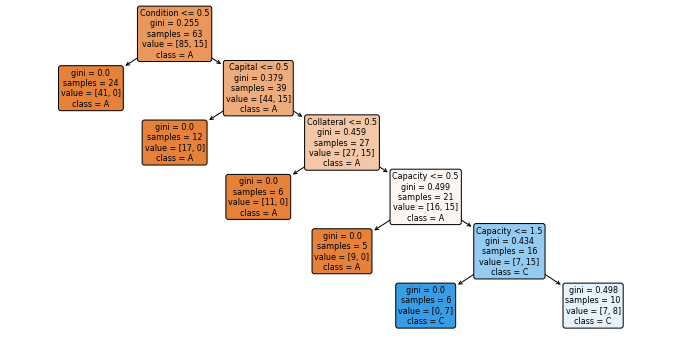

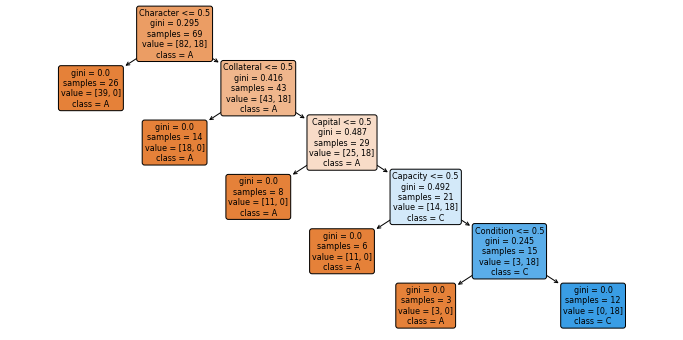

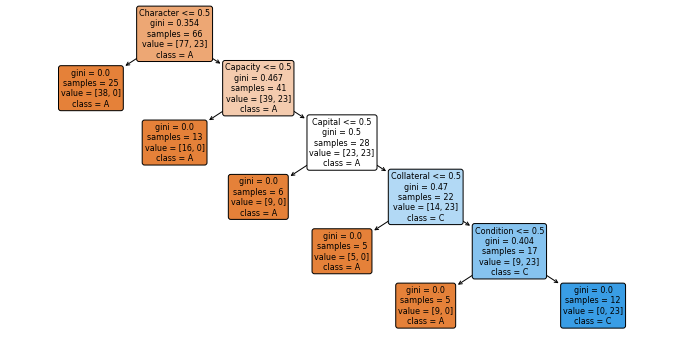

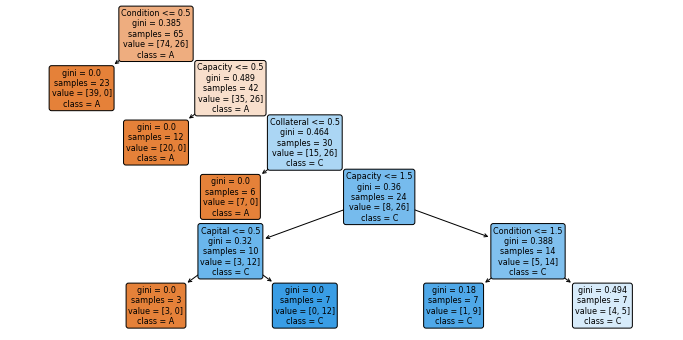

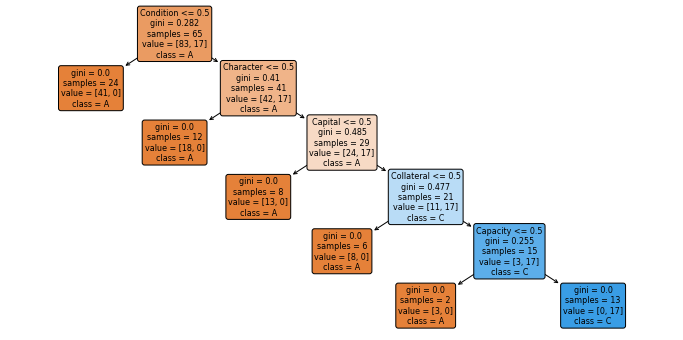

In [40]:
# Import `tree` module
from sklearn import tree

features = X.columns.values # The name of each column
classes = ['A','C'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk', 'medium risk', 'high risk']

for estimator in rfc.estimators_:
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

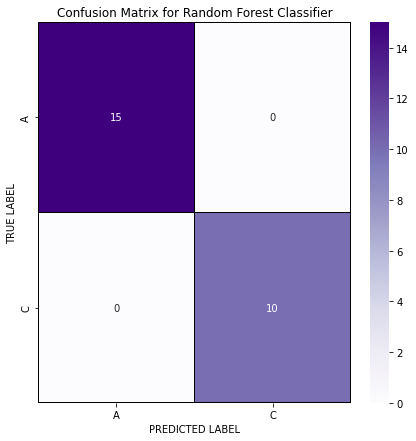

In [41]:
cm = confusion_matrix(y_test, y_pred)

x_axis_labels = ["A", "C"]
y_axis_labels = ["A", "C"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

In [42]:
cc  = [y_pred]
mod = ['Random Forest']

print('Classification Report for all models','\n')

for i,j in zip(cc, mod):
    print('========================================================')
    print(j,'\n\n' , classification_report(y_test, i))
    print('========================================================', '\n')

Classification Report for all models 

Random Forest 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25




In [43]:
#Correlation Analysis in tabular form
data.corr().round(2)

,Status,Character,Capacity,Capital,Condition,Collateral
Status,1.00,0.32,0.33,0.32,0.35,0.29
Character,0.32,1.00,0.11,0.15,0.18,0.11
Capacity,0.33,0.11,1.00,0.20,0.18,0.14
Capital,0.32,0.15,0.20,1.00,0.17,0.11
Condition,0.35,0.18,0.18,0.17,1.00,0.14
Collateral,0.29,0.11,0.14,0.11,0.14,1.00


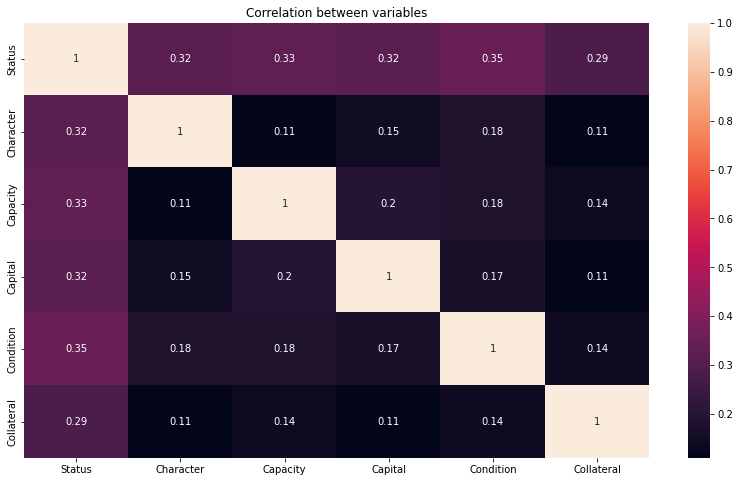

In [44]:
##Correlation Analysis in visual form
plt.figure(figsize=(14,8))
sns.heatmap(data.corr().round(2), annot=True)
plt.title('Correlation between variables')
plt.show()

In [45]:
#Analysis of correlation between target & feature variables 
data.corr()['Status'].sort_values().round(2)

Collateral    0.29
Character     0.32
Capital       0.32
Capacity      0.33
Condition     0.35
Status        1.00
Name: Status, dtype: float64

In [84]:
#Using the mapper to perform specific transformer to the features
m = DataFrameMapper([(['Character', LabelEncoder()]), (['Capacity', LabelEncoder()]), (['Capital', LabelEncoder()]),
                     (['Condition', LabelEncoder()]), (['Collateral', LabelEncoder()])])

In [85]:
#Making the pipeline stepwise
model = Pipeline(steps=[('mapper', m), ('mod', rfc)])
model

Pipeline(steps=[('mapper',
                 DataFrameMapper(features=[['Character', LabelEncoder()],
                                           ['Capacity', LabelEncoder()],
                                           ['Capital', LabelEncoder()],
                                           ['Condition', LabelEncoder()],
                                           ['Collateral', LabelEncoder()]])),
                ('mod',
                 RandomForestClassifier(max_depth=5, max_features='sqrt',
                                        n_estimators=10))])

In [86]:
data

,Status,Character,Capacity,Capital,Condition,Collateral
0,1,2,2,2,2,2
1,0,0,2,2,2,2
2,0,2,0,2,2,2
3,0,2,2,0,2,2
4,0,2,2,2,0,2
...,...,...,...,...,...,...
120,0,2,0,1,1,0
121,0,2,0,1,0,1
122,0,0,2,1,0,1
123,0,1,1,2,0,0


In [87]:
uid = msh_data.loc[:, ['Character', 'Capacity', 'Capital', 'Condition', 'Collateral','Status']]

In [88]:
#Picking up 10 random samples from our original data
ref = uid.sample(n=10, random_state=1)
ref

,Character,Capacity,Capital,Condition,Collateral,Status
74,Tidak,Sedang,Tidak,Normal,Sedang,Reject
45,Percaya,Sedang,Sedang,Baik,Sedang,Aproved
48,Percaya,Mampu,Sedang,Normal,Sedang,Aproved
31,Tidak,Tidak,Tidak,Baik,Kuat,Reject
65,Normal,Sedang,Tidak,Normal,Sedang,Reject
66,Normal,Sedang,Sedang,Tidak,Sedang,Reject
118,Normal,Sedang,Tidak,Tidak,Kuat,Reject
100,Percaya,Mampu,Baik,Normal,Tidak,Reject
115,Tidak,Sedang,Tidak,Normal,Kuat,Reject
33,Tidak,Tidak,Baik,Baik,Tidak,Reject


In [89]:
#Splititing the collected samples for testing 
uid_Xtest = ref.iloc[:, :-1]
uid_ytest = ref[['Status']]

In [90]:
data2 = uid.copy()
data2.shape

(125, 6)

In [91]:
data2

,Character,Capacity,Capital,Condition,Collateral,Status
0,Percaya,Mampu,Baik,Baik,Kuat,Aproved
1,Tidak,Mampu,Baik,Baik,Kuat,Reject
2,Percaya,Tidak,Baik,Baik,Kuat,Reject
3,Percaya,Mampu,Tidak,Baik,Kuat,Reject
4,Percaya,Mampu,Baik,Tidak,Kuat,Reject
...,...,...,...,...,...,...
120,Percaya,Tidak,Sedang,Normal,Tidak,Reject
121,Percaya,Tidak,Sedang,Tidak,Sedang,Reject
122,Tidak,Mampu,Sedang,Tidak,Sedang,Reject
123,Normal,Sedang,Baik,Tidak,Tidak,Reject


In [92]:
#Splitting the original data for training the model
X_t = data2.iloc[:, :-1]
y_t = data2[['Status']]

In [93]:
data2['Character']

0      Percaya
1        Tidak
2      Percaya
3      Percaya
4      Percaya
        ...   
120    Percaya
121    Percaya
122      Tidak
123     Normal
124      Tidak
Name: Character, Length: 125, dtype: object

In [94]:
y_t

,Status
0,Aproved
1,Reject
2,Reject
3,Reject
4,Reject
...,...
120,Reject
121,Reject
122,Reject
123,Reject


In [95]:
#Training the model
model.fit(X_t, y_t)

Pipeline(steps=[('mapper',
                 DataFrameMapper(features=[['Character', LabelEncoder()],
                                           ['Capacity', LabelEncoder()],
                                           ['Capital', LabelEncoder()],
                                           ['Condition', LabelEncoder()],
                                           ['Collateral', LabelEncoder()]])),
                ('mod',
                 RandomForestClassifier(max_depth=5, max_features='sqrt',
                                        n_estimators=10))])

In [96]:
#Model Testing & Evaluation

print('Actual data:', '   ',uid_ytest.values.flatten(), '\n')

print('Predicted data: ', model.predict(uid_Xtest))

Actual data:     ['Reject' 'Aproved' 'Aproved' 'Reject' 'Reject' 'Reject' 'Reject' 'Reject'
 'Reject' 'Reject'] 

Predicted data:  ['Reject' 'Aproved' 'Aproved' 'Reject' 'Reject' 'Reject' 'Reject' 'Reject'
 'Reject' 'Reject']


In [97]:
#Saving the model to file
dump(model, open('Kredit.pkl', 'wb'))

In [98]:
#Loading the file
ml = load(open('Kredit.pkl', 'rb'))

In [99]:
#Running the file for testing & evaluating 
print('Predicted Values:', ml.predict(uid_Xtest))

Predicted Values: ['Reject' 'Aproved' 'Aproved' 'Reject' 'Reject' 'Reject' 'Reject' 'Reject'
 'Reject' 'Reject']
